#Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



#Importing the dataset

In [2]:
dataset=pd.read_csv('Credit_Card_Applications.csv')
X= dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

#Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X= sc.fit_transform(X)

#Training the SOM from [here](https://github.com/JustGlowing/minisom)

In [4]:
from minisom import MiniSom
#object
som= MiniSom(x=10,y=10, input_len=15,sigma=1.0,learning_rate=0.5)
#initialize weights
som.random_weights_init(X)
#execute to train the self-organizing map on x
som.train_random(data=X,num_iteration=100)

#Visualize the results

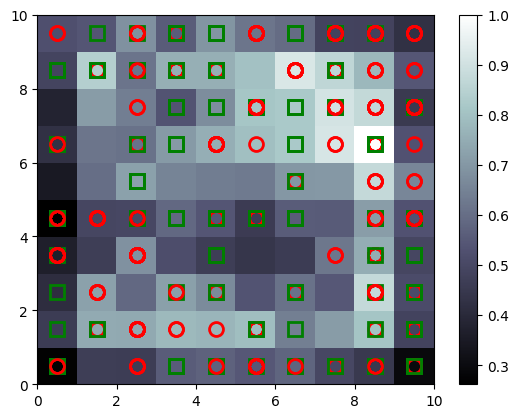

In [5]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers=['o','s']
colors=['r','g']


for i,x in enumerate(X):
    #winning node of the customer x.
    w=som.winner(x)
    plot(w[0]+0.5,
         w[1]+0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10, #markersize
         markeredgewidth=2) #marker edge with


show()


#Finding the frauds

In [6]:
#mappings=som.win_map(X) #provided the whole dataset
# frauds= mappings[(6,1)]#coordinates of frauds
#frauds   = sc.inverse_transform(frauds)